In [9]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("LG_G4_cherry_only_codeml_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [10]:
data

['t_n55         13.9724 (13.0131, 15.0348) (12.9900, 14.9846)  1.9946 (Jnode 106)\n',
 't_n56         13.7521 (12.8686, 14.6222) (12.8759, 14.6274)  1.7515 (Jnode 105)\n',
 't_n57         12.5861 (11.8274, 13.3380) (11.8269, 13.3355)  1.5085 (Jnode 104)\n',
 't_n58         10.5009 ( 9.9255, 11.0404) ( 9.9387, 11.0500)  1.1113 (Jnode 103)\n',
 't_n59         10.0742 ( 9.5283, 10.5913) ( 9.5452, 10.6028)  1.0577 (Jnode 102)\n',
 't_n60          9.5624 ( 9.0387, 10.0539) ( 9.0561, 10.0665)  1.0104 (Jnode 101)\n',
 't_n61          8.8028 ( 8.3166,  9.2611) ( 8.3405,  9.2773)  0.9368 (Jnode 100)\n',
 't_n62          4.1649 ( 3.6840,  4.6924) ( 3.6786,  4.6815)  1.0028 (Jnode 99)\n',
 't_n63          6.3642 ( 5.9726,  6.7419) ( 5.9849,  6.7509)  0.7659 (Jnode 98)\n',
 't_n64          4.7059 ( 4.3417,  5.0539) ( 4.3364,  5.0450)  0.7086 (Jnode 97)\n',
 't_n65          4.1274 ( 3.7922,  4.4500) ( 3.7954,  4.4518)  0.6564 (Jnode 96)\n',
 't_n66          3.2537 ( 2.9660,  3.5326) ( 2.9549,  3.51

In [11]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [12]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
    if line[3].startswith('('):
        lower_ci_iqtree.append(float(line[3][1:-1]))
    else:
        lower_ci_iqtree.append(float(line[3][1:-1]))
    if line[4].startswith('('):
        upper_ci_iqtree.append(float(line[4][1:-1]))
    else:
        upper_ci_iqtree.append(float(line[4][:-1]))
    # posterior_mean_baseml.append(float(line[4]))
    # lower_ci_baseml.append(float(line[5]))
    # upper_ci_baseml.append(float(line[6]))
#
# for line in mu_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_iqtree.append(float(line[1]))
#     lower_ci_mu_iqtree.append(float(line[3][:-1]))
#     upper_ci_mu_iqtree.append(float(line[4][:-1]))
#
# for line in var_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_iqtree.append(float(line[1]))
#     lower_ci_var_iqtree.append(float(line[3][:-1]))
#     upper_ci_var_iqtree.append(float(line[4][:-1]))

In [13]:
node_name

['t_n55',
 't_n56',
 't_n57',
 't_n58',
 't_n59',
 't_n60',
 't_n61',
 't_n62',
 't_n63',
 't_n64',
 't_n65',
 't_n66',
 't_n67',
 't_n68',
 't_n69',
 't_n70',
 't_n71',
 't_n72',
 't_n73',
 't_n74',
 't_n75',
 't_n76',
 't_n77',
 't_n78',
 't_n79',
 't_n80',
 't_n81',
 't_n82',
 't_n83',
 't_n84',
 't_n85',
 't_n86',
 't_n87',
 't_n88',
 't_n89',
 't_n90',
 't_n91',
 't_n92',
 't_n93',
 't_n94',
 't_n95',
 't_n96',
 't_n97',
 't_n98',
 't_n99',
 't_n100',
 't_n101',
 't_n102',
 't_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107']

In [14]:
posterior_mean_iqtree

[13.9724,
 13.7521,
 12.5861,
 10.5009,
 10.0742,
 9.5624,
 8.8028,
 4.1649,
 6.3642,
 4.7059,
 4.1274,
 3.2537,
 2.2605,
 1.5305,
 0.6478,
 4.813,
 9.6884,
 8.6302,
 8.7406,
 6.3245,
 5.5503,
 5.2608,
 9.477,
 8.8951,
 8.4871,
 7.9601,
 7.2567,
 6.9587,
 6.0299,
 5.4599,
 4.9455,
 3.7647,
 3.3463,
 6.1746,
 4.9081,
 9.205,
 2.3122,
 8.9071,
 8.2388,
 7.2832,
 6.6453,
 4.8827,
 5.3965,
 7.0246,
 6.6223,
 5.9046,
 4.8159,
 5.982,
 11.255,
 8.4938,
 5.3975,
 4.4341,
 9.7513]

In [15]:
lower_ci_iqtree

[5.0348,
 4.6222,
 3.338,
 0.9255,
 0.5283,
 0.0387,
 0.3166,
 0.684,
 0.9726,
 0.3417,
 0.7922,
 0.966,
 0.0577,
 0.3925,
 0.6159,
 0.4573,
 0.162,
 0.1138,
 0.2636,
 0.8814,
 0.1094,
 0.0501,
 0.968,
 0.4121,
 0.0102,
 0.5166,
 0.8504,
 0.5614,
 0.6712,
 0.1286,
 0.6331,
 0.5021,
 0.0987,
 0.793,
 0.5721,
 0.7081,
 0.9083,
 0.4292,
 0.8032,
 0.9018,
 0.3035,
 0.5885,
 0.1185,
 0.6319,
 0.2447,
 0.5317,
 0.4489,
 0.5163,
 1.9409,
 0.8374,
 0.7651,
 0.6887,
 0.7221]

In [16]:
upper_ci_iqtree

[12.99,
 12.8759,
 11.8269,
 11.0404,
 10.5913,
 10.0539,
 9.2611,
 4.6924,
 6.7419,
 5.0539,
 4.45,
 3.5326,
 2.4754,
 1.6887,
 0.7171,
 5.1491,
 10.1942,
 9.1266,
 9.2036,
 6.7731,
 6.0028,
 5.6992,
 9.9451,
 9.3369,
 8.9168,
 8.3751,
 7.6372,
 7.3391,
 6.3884,
 5.8077,
 5.2821,
 4.0752,
 3.6491,
 6.5474,
 5.2501,
 9.6608,
 2.7536,
 9.3408,
 8.6225,
 7.6018,
 6.9162,
 5.1465,
 5.5332,
 7.3761,
 6.9663,
 6.2583,
 5.1306,
 6.4131,
 10.5627,
 9.1465,
 6.0192,
 5.0926,
 11.0872]

In [17]:
file_LG = open("LG_cherry_only_codeml_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
    if line[3].startswith('('):
        lower_ci_baseml.append(float(line[3][1:-1]))
    else:
         lower_ci_baseml.append(float(line[3][:-1]))
    if line[4].startswith('('):
        upper_ci_baseml.append(float(line[4][1:-1]))
    else:
         upper_ci_baseml.append(float(line[4][:-1]))
        
    
# for line in mu_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_baseml.append(float(line[1]))
#     lower_ci_mu_baseml.append(float(line[3][:-1]))
#     upper_ci_mu_baseml.append(float(line[4][:-1]))
    
# for line in var_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_baseml.append(float(line[1]))
#     lower_ci_var_baseml.append(float(line[3][:-1]))
#     upper_ci_var_baseml.append(float(line[4][:-1]))

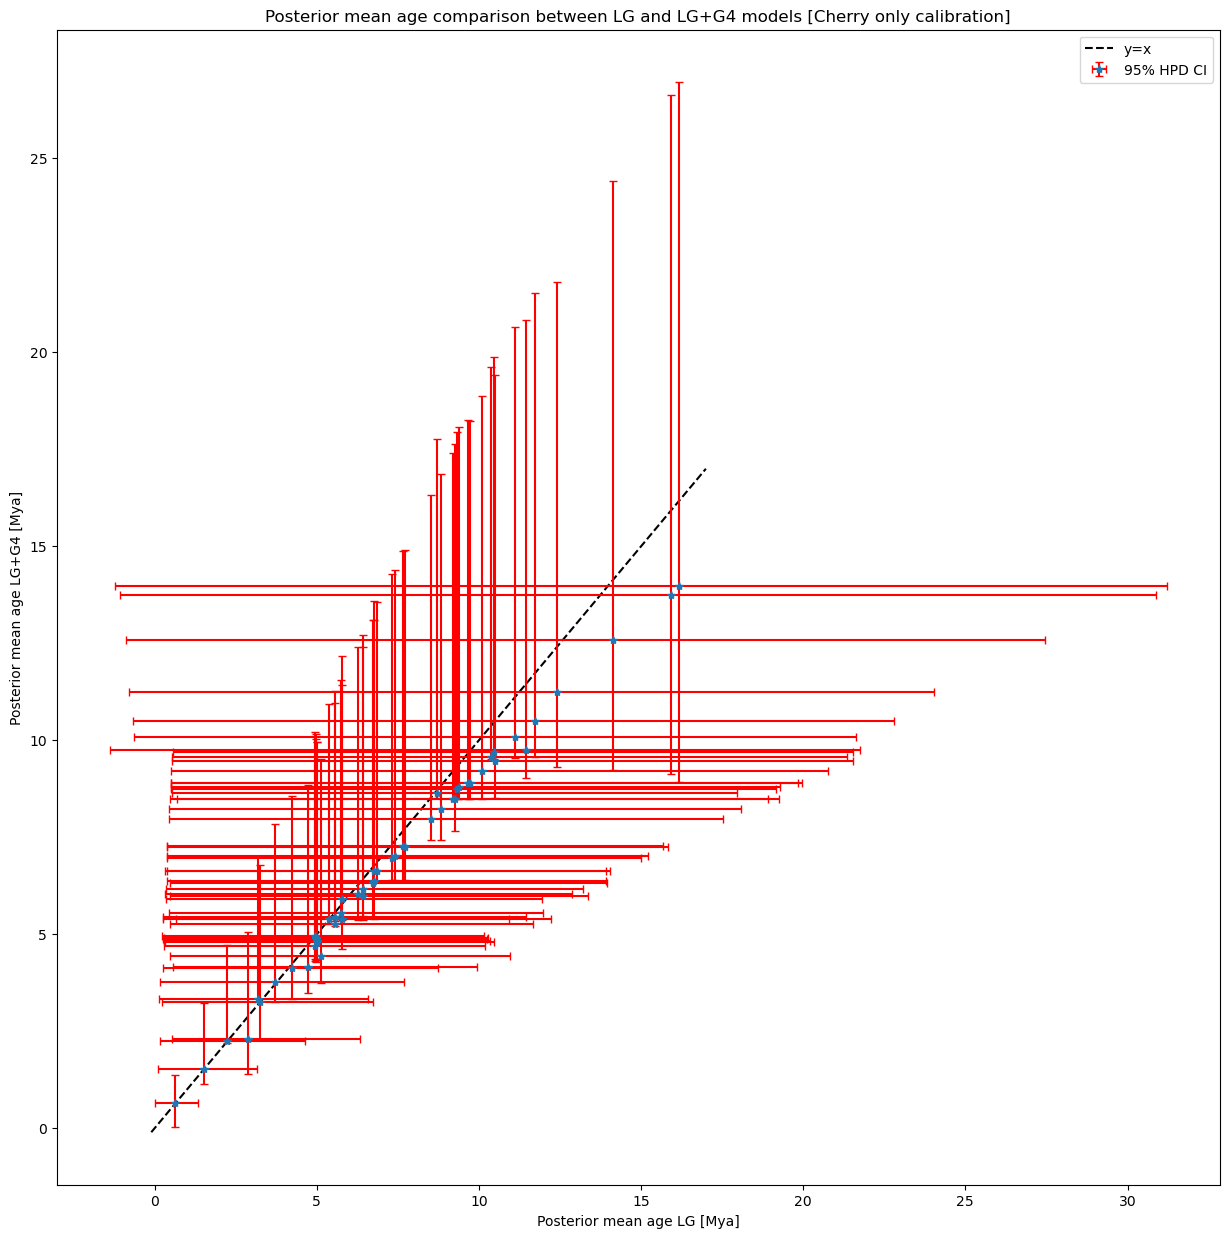

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(15, 15))
ax.plot([-0.1,17], 
        [-0.1, 17], 
        'k--', label='y=x')
ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
            xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')

# Labels and title
ax.set_xlabel('Posterior mean age LG [Mya]')
ax.set_ylabel('Posterior mean age LG+G4 [Mya]')
ax.set_title('Posterior mean age comparison between LG and LG+G4 models [Cherry only calibration]')
ax.legend()

# Show plot
# plt.show()
plt.savefig('./metazoa_posterior_mean_age_comparison_LG_G4_co.png')

In [19]:
posterior_mean_baseml

[16.1661,
 15.9364,
 14.1365,
 11.7319,
 11.1144,
 10.3859,
 9.378,
 4.7392,
 6.757,
 4.9397,
 4.2313,
 3.2608,
 2.2346,
 1.518,
 0.6418,
 5.0166,
 10.48,
 8.7007,
 9.3145,
 6.7245,
 5.7423,
 5.5745,
 10.4922,
 9.7191,
 9.2076,
 8.54,
 7.7168,
 7.3133,
 6.2691,
 5.5732,
 4.9476,
 3.7277,
 3.1905,
 6.4335,
 4.9879,
 10.1076,
 2.8951,
 9.6643,
 8.8278,
 7.6583,
 6.8737,
 4.9901,
 5.3893,
 7.413,
 6.7699,
 5.7809,
 5.0105,
 6.4424,
 12.4045,
 9.265,
 5.7887,
 5.1418,
 11.4537]

In [20]:
posterior_mean_iqtree

[13.9724,
 13.7521,
 12.5861,
 10.5009,
 10.0742,
 9.5624,
 8.8028,
 4.1649,
 6.3642,
 4.7059,
 4.1274,
 3.2537,
 2.2605,
 1.5305,
 0.6478,
 4.813,
 9.6884,
 8.6302,
 8.7406,
 6.3245,
 5.5503,
 5.2608,
 9.477,
 8.8951,
 8.4871,
 7.9601,
 7.2567,
 6.9587,
 6.0299,
 5.4599,
 4.9455,
 3.7647,
 3.3463,
 6.1746,
 4.9081,
 9.205,
 2.3122,
 8.9071,
 8.2388,
 7.2832,
 6.6453,
 4.8827,
 5.3965,
 7.0246,
 6.6223,
 5.9046,
 4.8159,
 5.982,
 11.255,
 8.4938,
 5.3975,
 4.4341,
 9.7513]

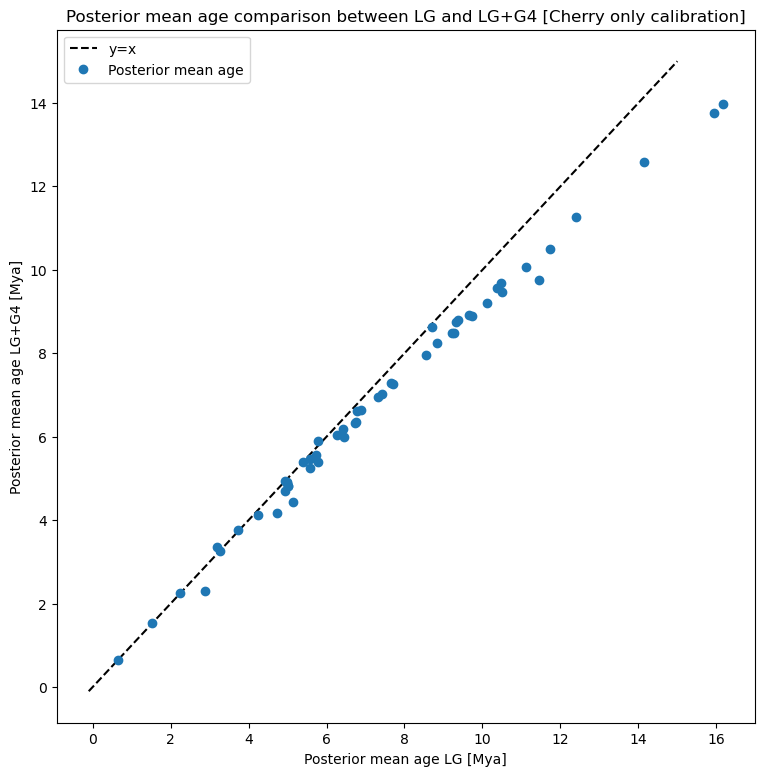

In [21]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([-0.1,15], 
        [-0.1, 15], 
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age LG [Mya]')
ax.set_ylabel('Posterior mean age LG+G4 [Mya]')
ax.set_title('Posterior mean age comparison between LG and LG+G4 [Cherry only calibration]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./metazoa_posterior_mean_age_comparison_LG_G4_co_scatter.png')